In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from dask.diagnostics import ProgressBar

In [2]:
# already processed by `preprocess_temperature_data.ipynb`
dr = xr.open_dataarray('./temperature_512core_processed.nc', chunks={'time': 15})
dr

<xarray.DataArray 'temperature' (time: 225, y: 1025, x: 2049)>
dask.array<shape=(225, 1025, 2049), dtype=float64, chunksize=(15, 1025, 2049)>
Coordinates:
  * time     (time) float64 0.0 0.0001 0.0004115 ... 0.2204 0.2214 0.2224
  * y        (y) float64 0.0 2.353e-06 9.412e-06 2.118e-05 ... 1.0 1.0 1.0 1.0
  * x        (x) float64 0.0 0.0009766 0.001953 0.00293 ... 1.998 1.999 2.0

In [3]:
T_bottom = dr.isel(y=0).mean(dim='x')
T_top = dr.isel(y=-1).mean(dim='x')  # just 0 

T_bottom 

<xarray.DataArray 'temperature' (time: 225)>
dask.array<shape=(225,), dtype=float64, chunksize=(15,)>
Coordinates:
  * time     (time) float64 0.0 0.0001 0.0004115 ... 0.2204 0.2214 0.2224
    y        float64 0.0

In [4]:
H = 1  # y_top - y_bottom
delta_T = T_bottom - T_top
delta_T

<xarray.DataArray 'temperature' (time: 225)>
dask.array<shape=(225,), dtype=float64, chunksize=(15,)>
Coordinates:
  * time     (time) float64 0.0 0.0001 0.0004115 ... 0.2204 0.2214 0.2224

In [5]:
dTdy = dr.differentiate('y').isel(y=0).mean(dim='x') # dT/dt averaged over X
dTdy

<xarray.DataArray 'temperature' (time: 225)>
dask.array<shape=(225,), dtype=float64, chunksize=(15,)>
Coordinates:
  * time     (time) float64 0.0 0.0001 0.0004115 ... 0.2204 0.2214 0.2224
    y        float64 0.0

In [6]:
Nu = - H / delta_T * dTdy
with ProgressBar():
    Nu = Nu.compute()

[###########                             ] | 27% Completed |  1.8s

/home/ubuntu/miniconda/envs/ac290/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*args2)
/home/ubuntu/miniconda/envs/ac290/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in multiply
  return func(*args2)


[########################################] | 100% Completed |  6.4s


In [7]:
# plt.rcParams["figure.figsize"] = (6,4)
# plt.rcParams['legend.fontsize'] = 13

plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 15

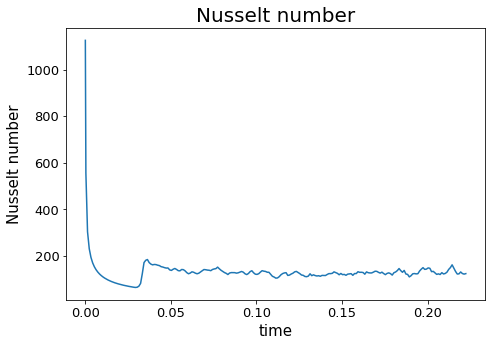

In [8]:
Nu.plot(size=5)
plt.ylabel('Nusselt number')
plt.title('Nusselt number')
plt.savefig('Nusselt_number.png', dpi=300)

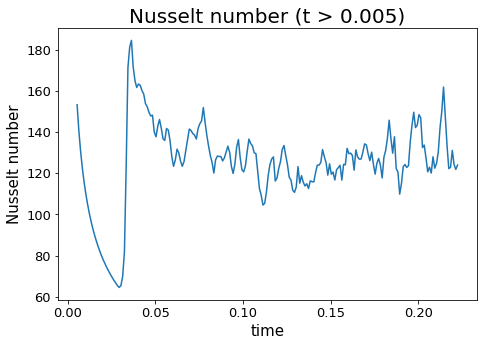

In [9]:
Nu.sel(time=slice(0.005, None)).plot(size=5)
plt.ylabel('Nusselt number')
plt.title('Nusselt number (t > 0.005)')
plt.savefig('Nusselt_number_truncate.png', dpi=300)